# Skills: Programming - Introduction level
### Dr. Mario Silic
## Group Project - Predicting Tomorrow's Profit: A Forecasting Model for Walmart Sales
The primary objective of this group project is the development of a forecasting model to predict Walmart sales. By leveraging a comprehensive dataset (Ahmedov, n.d.) with historical sales data, we will identify behavioral patterns of customers by employing various machine-learning models. By doing so, we also aim to answer the following research question: What are the main underlying patterns inherent in Walmart's historical sales data? How can we use predictive models to effectively capture these patterns, fostering our insights into the factors shaping Walmart's retail performance? 

#### Group Members:
- Collin Arendsen (21-617-204)
- Gabriel Oget (22-610-893)
- Luca Drevermann (21-620-844)
- Qishuangshuang Wang (23-606-080)
- (Roksolana Malyniak)

## Steps
The project is comprised of the following key steps:

1. **Problem Definition**: Identify the need for sales forecasting.

2. **Data Preprocessing and Feature Engineering**: Combine the downloaded dataframes into one main dataset. Clean the data by handling missing values, and outliers and encoding categorical variables. Create new features to assist data analysis and to improve the model's performance.

3. **Data Exploration and Analysis**: Conduct a time series analysis to understand the data, correct potential underlying trends, identify seasonality, and analyze other relevant features.

4. **Training and Evaluating Machine Learning Models**: Select relevant machine learning algorithms for time series forecasting such as Random Forest and ARIMA, split the data into training and testing sets, and train the models on the training dataset. Evaluate the model's performance using the testing dataset. Tune hyperparameters if necessary. 

5. **Deployment**: Utilize Streamlit to create a user-friendly web interface to forecast sales.

## 1. Problem Definition
### The Need for Sales Forecasting
Turner et al. (2022) assert that in 2022, Walmart experienced a 32% increase in inventory in Q1 due to increased inflation rates and supply-chain challenges, ultimately leading to financial distress. In response, the company has been proactively aiming to increase forecasting accuracy (Turner et al., 2022). Furthermore, inaccurate forecasting predictions are one of the main problems faced by retailers today (Chaubard, 2023, p. 152). Therefore, it is vital to take a closer look at sales numbers in an attempt to mitigate this problem.

Due to the fluctuating nature of sales figures, it is essential that companies implement accurate forecasting algorithms to ensure operational efficiecy. Without a clear understanding of underlying trends, these patterns can cause significant financial losses for retail companies. For instance, as Chaubard (2023) discusses, in the retail industry, the main objective is to prevent overstock and stockouts (p. 153). Failing to do so engenders forfeiture of potential sales as well as reduced customer satisfaction or leads to excess inventory, thus increasing holding costs and strain on storage facilities.

We have identified the following key benefits of accurate sales forecasting, though it is important to note that this list is not exhaustive:
- Optimized inventory management
- Increased strategic planning
- Streamlining the ordering process
- Improved response to demand fluctuations 
- Optimized budget planning

Therefore, the overlying objective is to employ a model that accurately predicts Walmart sales. While we recognize that Walmart requires far more sophisticated machine learning models to ensure accurate sale predictions, this undertaking presents an opportunity for us to tackle a real-world problem by utilizing simple machine learning algorithms, thus enhancing our understanding of data science business cases.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## 2. Data Cleaning

### 2.1 Importing and Merging Datasets

In [2]:
# Load "features" dataset
file_path_features = "features.csv"
df_features = pd.read_csv(file_path_features)
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
# Load "stores" dataset
file_path_stores = "stores.csv"
df_stores = pd.read_csv(file_path_stores)
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
# Load "train" dataset
file_path_train = "train.csv"
df_train = pd.read_csv(file_path_train).drop(columns=['IsHoliday'])
df_train.head()

,Store,Dept,Date,Weekly_Sales
0,1,1,2010-02-05,24924.50
1,1,1,2010-02-12,46039.49
2,1,1,2010-02-19,41595.55
3,1,1,2010-02-26,19403.54
4,1,1,2010-03-05,21827.90


In [5]:
# Merge the "train", "features", and "stores" dataframes
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_stores, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [6]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size'],
      dtype='object')

### 2.2 Handling Negative and NaN Data 

In [7]:
print(f"The lowest recorded weekly sales are: {df['Weekly_Sales'].min()} and the highest: {df['Weekly_Sales'].max()}.")

The lowest recorded weekly sales are: -4988.94 and the highest: 693099.36.


In [8]:
# Sales cannot be negative, so we will replace negative values with 0
df.loc[df.Weekly_Sales < 0, 'Weekly_Sales'] = 0

In [9]:
df.loc[df['IsHoliday']==True, 'Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [10]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Type                 0
Size                 0
dtype: int64

In [11]:
# Replace NaN values with 0 (assuming that NaN values mean no reduction in price)
df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

In [12]:
df

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421566,45,94,2012-10-26,5203.31,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421567,45,95,2012-10-26,56017.47,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421568,45,97,2012-10-26,6817.48,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221


### 2.3 Feature Engineering

#### 2.3.1 Holiday Features

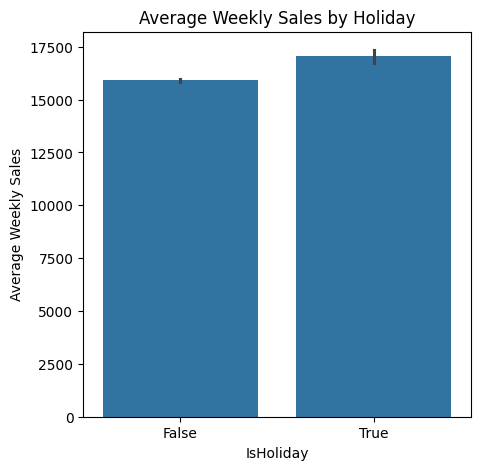

In [13]:
# Display average weekly sales by holiday
plt.figure(figsize=(5,5))
sns.barplot(data=df, x='IsHoliday', y='Weekly_Sales').set_title('Average Weekly Sales by Holiday')
plt.ylabel('Average Weekly Sales')
plt.show()

It is observable that holiday average weekly sales are higher than normal dates.

In [14]:
# Seperating the holiday column into specific holiday features
holidaydic = {'superbowl' : ['2010-02-12','2011-02-11','2012-02-10'],
              'laborday' : ['2010-09-10','2011-09-09','2012-09-07'],
              'thanksgiving' : ['2010-11-26','2011-11-25'],
              'newyear' : ['2010-12-31','2011-12-30']
              }

for holiday in holidaydic.keys():
    for date in holidaydic[holiday]:
        df.loc[df['Date']==date, holiday] = 1
    df[holiday].fillna(0, inplace=True)
    df[holiday] = df[holiday].astype(bool)

Text(0.5, 1.0, 'Mean Weekly Sales by Holiday')

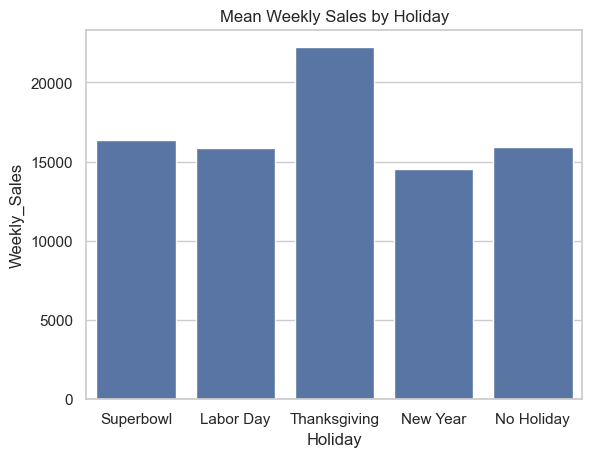

In [15]:
# Plot mean weekly sales by holiday
sns.set(style="whitegrid")

holiday_sales_df = pd.DataFrame({
    'Holiday': ['Superbowl', 'Labor Day', 'Thanksgiving', 'New Year', 'No Holiday'],
    'Weekly_Sales': [
        df.loc[df.superbowl == True, 'Weekly_Sales'].mean(),
        df.loc[df.laborday == True, 'Weekly_Sales'].mean(),
        df.loc[df.thanksgiving == True, 'Weekly_Sales'].mean(),
        df.loc[df.newyear == True, 'Weekly_Sales'].mean(),
        df.loc[df.IsHoliday == False, 'Weekly_Sales'].mean()
    ]
})

sns.barplot(x='Holiday', y='Weekly_Sales', data=holiday_sales_df)
plt.title('Mean Weekly Sales by Holiday')

As is evident, the mean weekly sales on Thanksgiving are considerably higher compared to other national holidays. However, in the week of New Year's Eve, sales are slightly lower than on no-holiday dates. Furthermore as discussed later on in Chapter 2.1.2, in week 50/51 of the year, the average sales are highest and then substantially decrease in week 52. A possible explanation for this could be that on New Year's Eve most Walmart locations have adjusted store hours, leading to a slight decrease in sales. Additionally, the aftermath of Christmas Shopping might also negatively impact sales.

#### 2.3.2 Temporal Features

In [16]:
# Convert "Date" column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
# Create year, month, day, and week features
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month
df['day'] = df.Date.dt.day
df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [18]:
df

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Type,Size,superbowl,laborday,thanksgiving,newyear,year,month,day,WeekOfYear
0,1,1,2010-02-05,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,...,A,151315,False,False,False,False,2010,2,5,5
1,1,2,2010-02-05,50605.27,42.31,2.572,0.00,0.00,0.0,0.00,...,A,151315,False,False,False,False,2010,2,5,5
2,1,3,2010-02-05,13740.12,42.31,2.572,0.00,0.00,0.0,0.00,...,A,151315,False,False,False,False,2010,2,5,5
3,1,4,2010-02-05,39954.04,42.31,2.572,0.00,0.00,0.0,0.00,...,A,151315,False,False,False,False,2010,2,5,5
4,1,5,2010-02-05,32229.38,42.31,2.572,0.00,0.00,0.0,0.00,...,A,151315,False,False,False,False,2010,2,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,58.85,3.882,4018.91,58.08,100.0,211.94,...,B,118221,False,False,False,False,2012,10,26,43
421566,45,94,2012-10-26,5203.31,58.85,3.882,4018.91,58.08,100.0,211.94,...,B,118221,False,False,False,False,2012,10,26,43
421567,45,95,2012-10-26,56017.47,58.85,3.882,4018.91,58.08,100.0,211.94,...,B,118221,False,False,False,False,2012,10,26,43
421568,45,97,2012-10-26,6817.48,58.85,3.882,4018.91,58.08,100.0,211.94,...,B,118221,False,False,False,False,2012,10,26,43


In [19]:
# saving the dataframe to a csv file to be used by the app
df.to_csv('final_df.csv')

## 3. Data Analysis

In [20]:
print(f"The mim date is: {df.Date.min()} and the max date is: {df.Date.max()}")

The mim date is: 2010-02-05 00:00:00 and the max date is: 2012-10-26 00:00:00


The dataframe includes sales data ranging from 2010-02-05 to 2012-10-26. In the following Chapter, we have opted to compute the mean weekly sales across all entries rather than restricting the analysis to solely completed years. By doing so, we aim to gain more realistic insights. However, it is essential to notice that the average sales figures might differ when only analysing completed years.

### 3.1 Time Series Analysis

#### 3.1.1 Trend

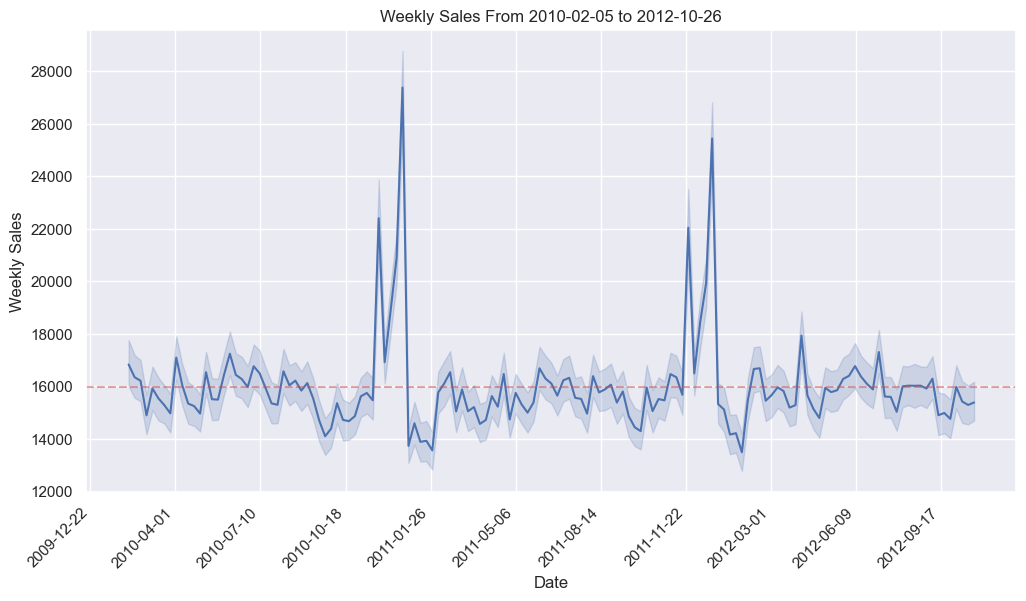

In [21]:
# Plot weekly sales over time from 2010-02-05 to 2012-10-12
sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df['Date'], y='Weekly_Sales')
plt.axhline(df['Weekly_Sales'].mean(), color='r', alpha=0.5, linestyle='--')

plt.title('Weekly Sales From 2010-02-05 to 2012-10-26')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

plt.xticks(rotation=45, ha='right')  # Rotate X labels

# Adjust x label frequency
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(100))  # Show every 100th date as all dates appear multiple times in the dataset for each store and department

plt.show()

It is apparent that at the end of the year (Nov to Dec), weekly sales are considerably higher than during other periods of the year. At the end of 2010 to the beginning of 2011, the spike was the highest. In the following year, the maximum was slightly lower. The average weekly sales fluctuate around $16,000. Furthermore, as can be observed in the above plot, there is no significant trend that would need to be corrected.

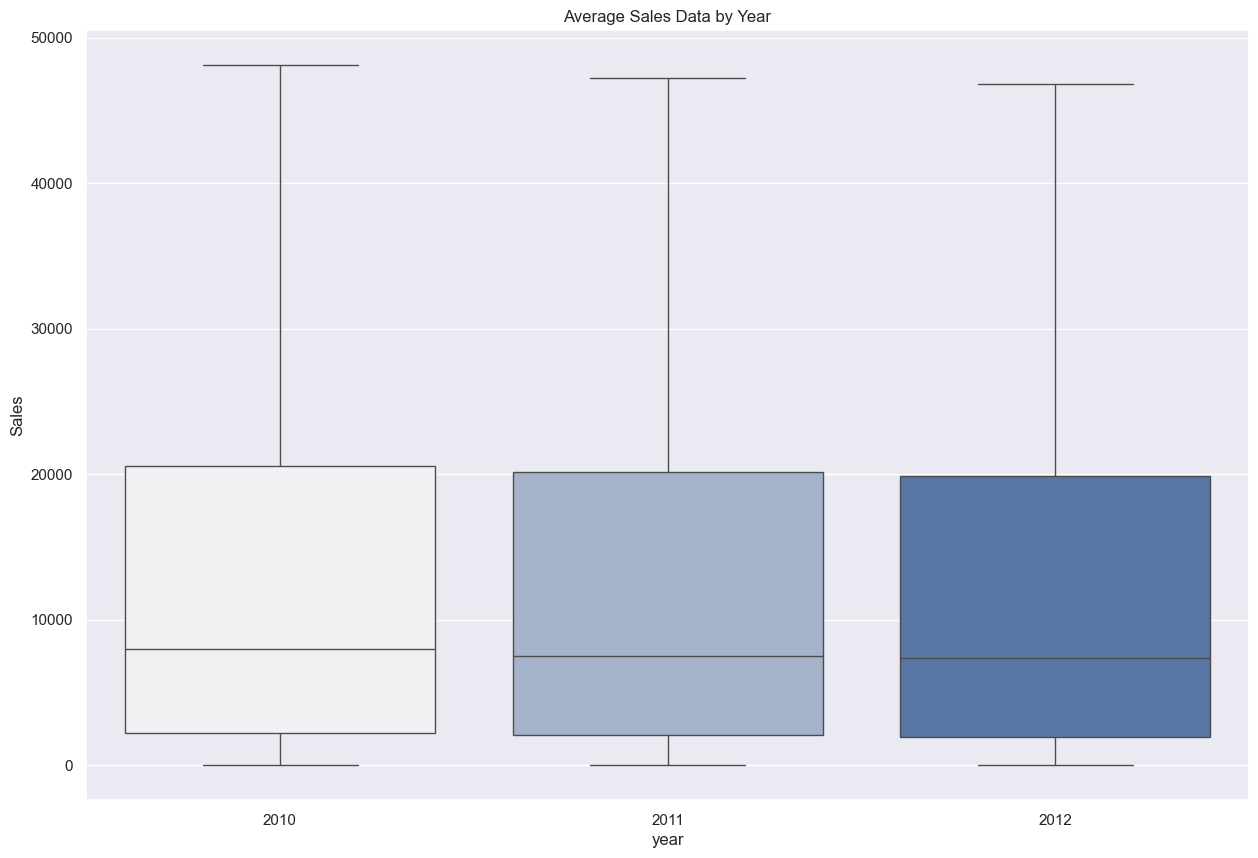

In [22]:
# Plot Sales Data by Year
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='year', y='Weekly_Sales', hue='year',
            palette='light:b', showfliers=False, legend=False
           ).set_title('Average Sales Data by Year')
plt.ylabel('Sales')
plt.show()

As demonstrated, the average weekly sales in 2010 were the highest and there was a decrease in sales from 2010 to 2012. Furthermore, the maximum (Q3 + 1.5*IQR) appears to decline. However, it is again important to address that sales only range from 2010-02-05 to 2012-10-26. As observed in Chapter 2.1.2, average weekly sales are considerably higher at the end of the year. However, the year 2012 is not yet completed and sales in the first month of 2010 are also not listed in the dataset which could explain the diminishing trajectory. Therefore, we can assume that the average weekly sales in 2010 were slightly lower and in 2012 fractionally higher.

#### 3.1.2 Seasonality

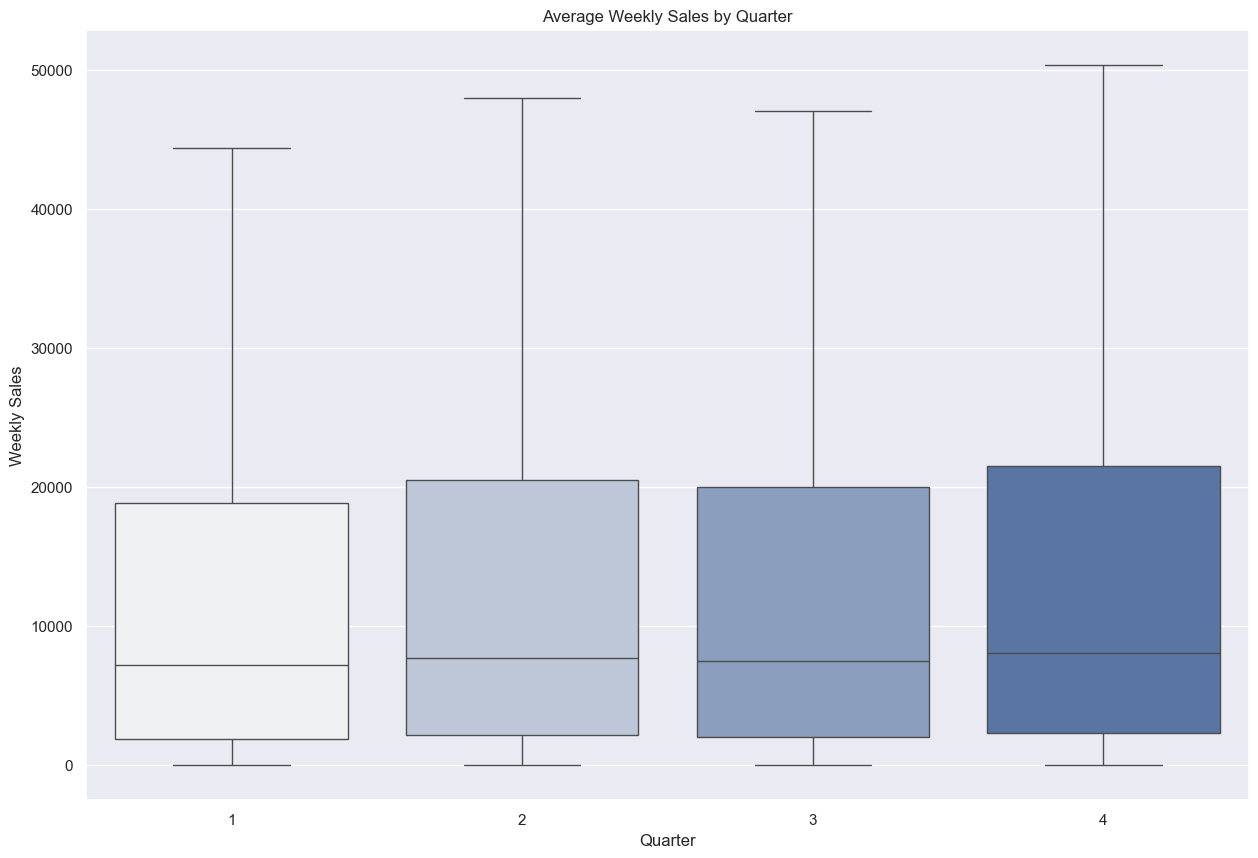

In [23]:
# Plot data
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x=df.Date.dt.quarter, y='Weekly_Sales', hue=df.Date.dt.quarter,
            palette='light:b', showfliers=False, legend=False
           ).set_title('Average Weekly Sales by Quarter')
plt.ylabel('Weekly Sales')
plt.xlabel('Quarter')
plt.show()

Q4 has the highest average weekly sales and Q1 has the lowest.

Text(0.5, 1.0, 'Average Weekly Sales per Month')

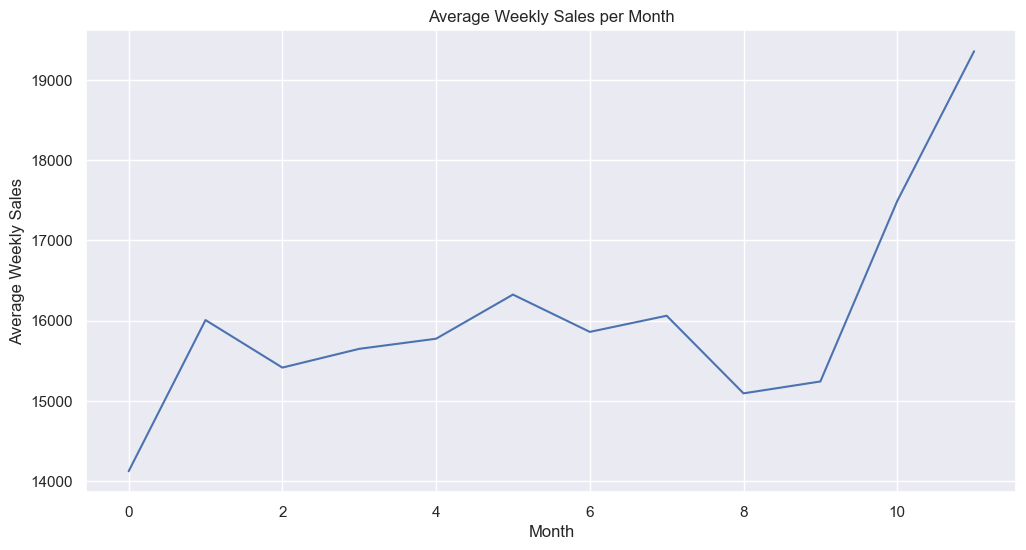

In [24]:
dfmonth = df.groupby(['month']).agg({'Weekly_Sales': 'mean'}).reset_index()

# Create the lineplot and add a trendline
plt.figure(figsize=(12, 6))
sns.lineplot(x=dfmonth.index, y='Weekly_Sales', data=dfmonth, errorbar=None)

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales per Month')

There is a significant increase in average weekly sales in November and December. This could be due to holiday shopping and festive season promotions, resulting in increased consumer spending. Furthermore, in the first month of the year, sales reach their lowest point. This reduced consumer spending could be caused by the aftermath of holiday spending or New Year budgeting resolutions. Additionally, in month 5, sales tend to increase slightly. 

Text(0.5, 1.0, 'Mean Weekly Sales over Year')

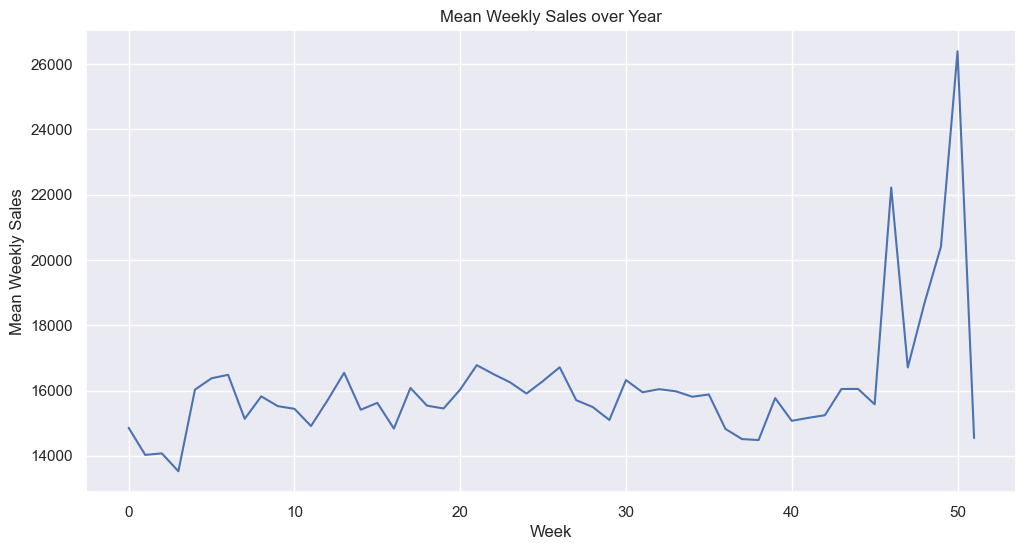

In [25]:
dfweek = df.groupby(['WeekOfYear']).agg({'Weekly_Sales': 'mean'}).reset_index()

# Create the lineplot and add a trendline
plt.figure(figsize=(12, 6))
sns.lineplot(x=dfweek.index, y='Weekly_Sales', data=dfweek, errorbar=None)

# Add labels and a title
plt.xlabel('Week')
plt.ylabel('Mean Weekly Sales')
plt.title('Mean Weekly Sales over Year')

Clearly, towards the end of the year, there are two noticeable spikes. Weeks 1-3 are characterized by a mildly decreasing weekly sale average.

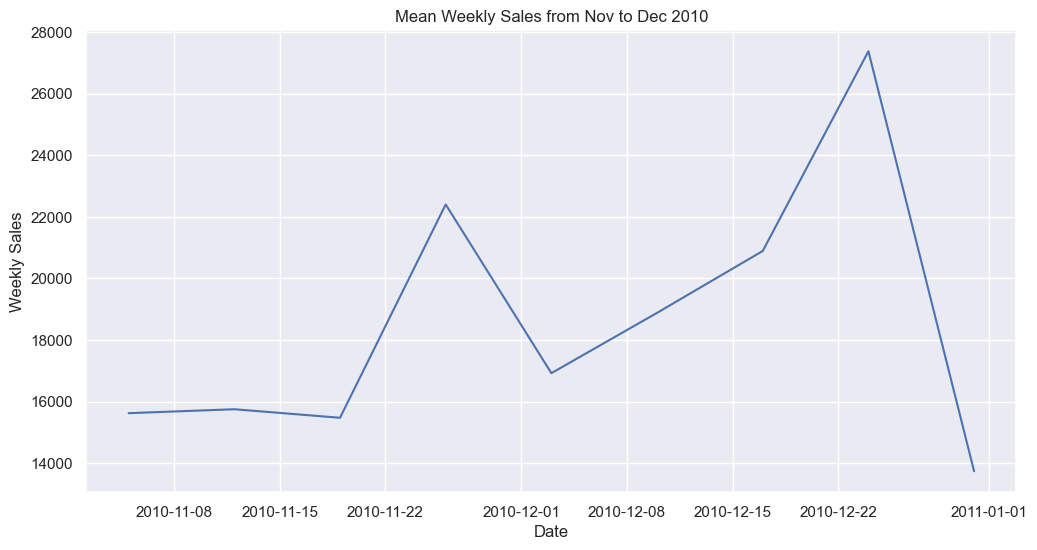

In [26]:
filtered_data = df.loc[(df['Date'] > '2010-11-01') & (df['Date'] < '2011-01-01')]
filtered_data

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=filtered_data, errorbar=None)

# Set title and labels
plt.title('Mean Weekly Sales from Nov to Dec 2010')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

# Show the plot
plt.show()


In [27]:
# Get the 2 local maxima
filtered_data_maxima = filtered_data.groupby(['Date']).agg({'Weekly_Sales': 'mean'}).reset_index()
maxima = filtered_data_maxima.nlargest(2, 'Weekly_Sales')
print(f"The 2 local maxima are on: {list(maxima['Date'])}.")

The 2 local maxima are on: [Timestamp('2010-12-24 00:00:00'), Timestamp('2010-11-26 00:00:00')].


It is apparent that the 2 local weekly sales maxima from 2010-11-01 to 2011-01-01 are on 2010-12-24 and 2010-11-26. However, it is important to note that entries were only made on a weekly basis, implying that a maximum of the 7 following could be included. Nevertheless, our findings are logical as on Christmas Eve (2010-12-24), consumers make last-minute purchases which contribute to increased consumer spending. Additionally, on Thanksgiving (2010-11-25) and Black Friday (2010-11-26), consumers tend to spend considerably more due to promotions. 

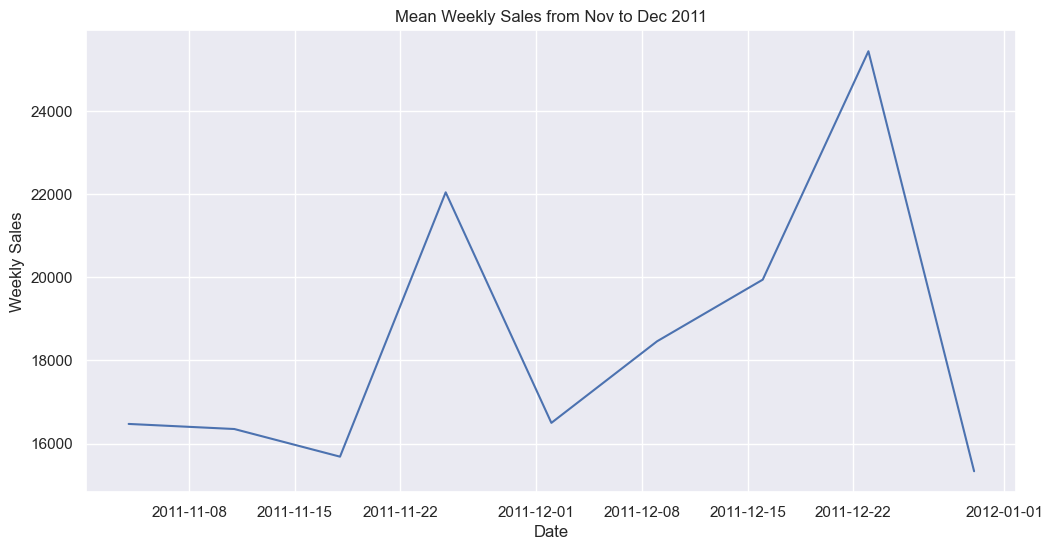

In [28]:
filtered_data = df.loc[(df['Date'] > '2011-11-01') & (df['Date'] < '2012-01-01')]
filtered_data

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=filtered_data, errorbar=None)

# Set title and labels
plt.title('Mean Weekly Sales from Nov to Dec 2011')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

# Show the plot
plt.show()


In [29]:
# Get the 2 local maxima
filtered_data_maxima = filtered_data.groupby(['Date']).agg({'Weekly_Sales': 'mean'}).reset_index()
maxima = filtered_data_maxima.nlargest(2, 'Weekly_Sales')
print(f"The 2 local maxima are on: {list(maxima['Date'])}.")

The 2 local maxima are on: [Timestamp('2011-12-23 00:00:00'), Timestamp('2011-11-25 00:00:00')].


In the following year, we can observe the same pattern. 

#### 3.1.3 Other Features - Correlation Matrix

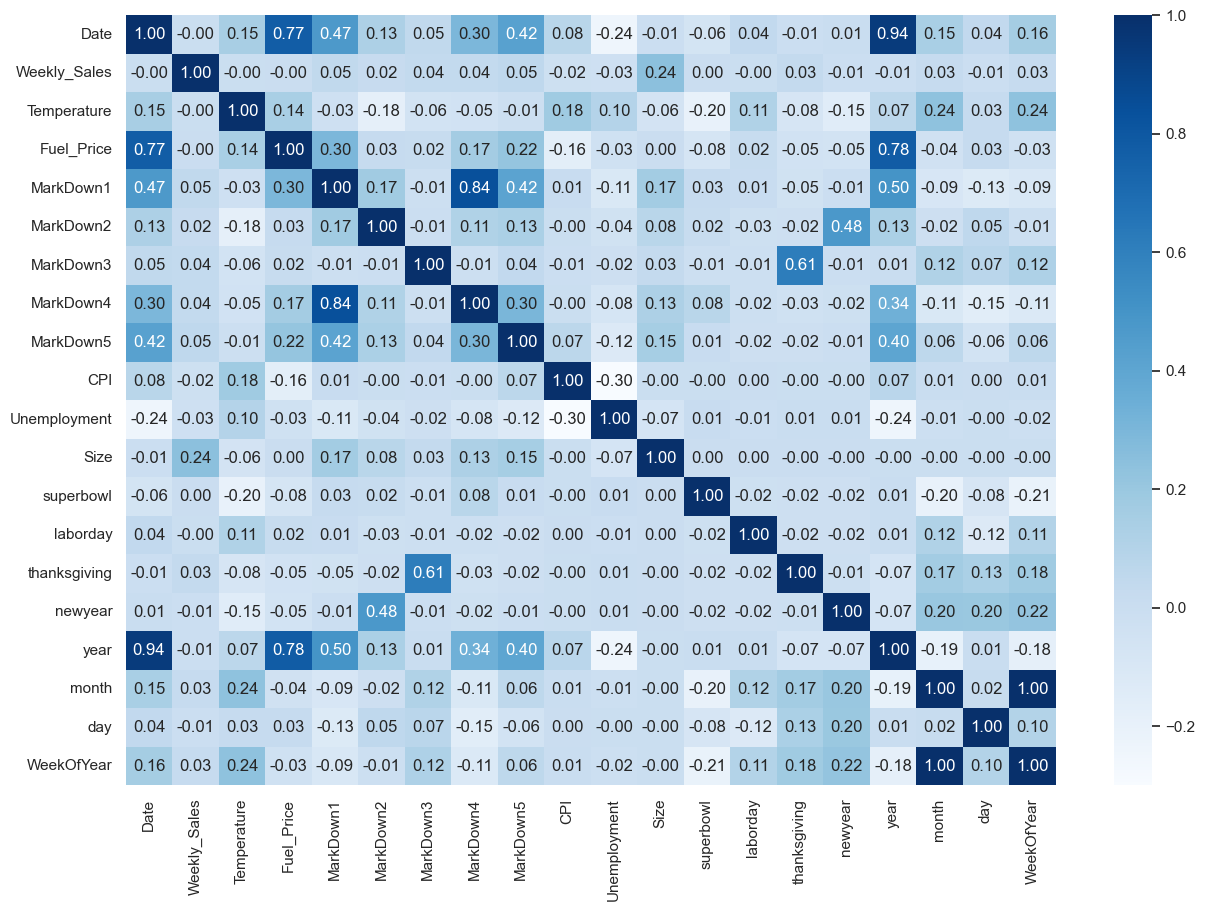

In [30]:
num_cols = [x for x in df.columns if x not in ['Type','IsHoliday','Dept','Store']]

correlation_matrix = df[num_cols].corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")

# Show the plot
plt.show()

We can observe the following:
- Markdown1 and Markdown4 have a high correlation, meaning that both are usually employed simultaneously
- There is a high correlation between Thanksgiving and Markdown3 which suggests that this promotion is mainly used for Thanksgiving and Black Friday
- New Year and MarkDown2 have a positive correlation. This means that Markdown2 is primarily an end-of-the-year promotional offer
- Size and Markdown1 and Markdown5 have a positive correlation which would imply that these promotions are mainly offered in bigger stores
- Markdown2 has a negative correlation with the Temperature which means that it is usually offered during colder periods
- Markdown3 and the Year have a negative correlation. This implies that the promotions tend to decrease as the years progress
- CPI, Temperature, Unemployment, and Fuel_Price do not correlate with the Weekly_Sales

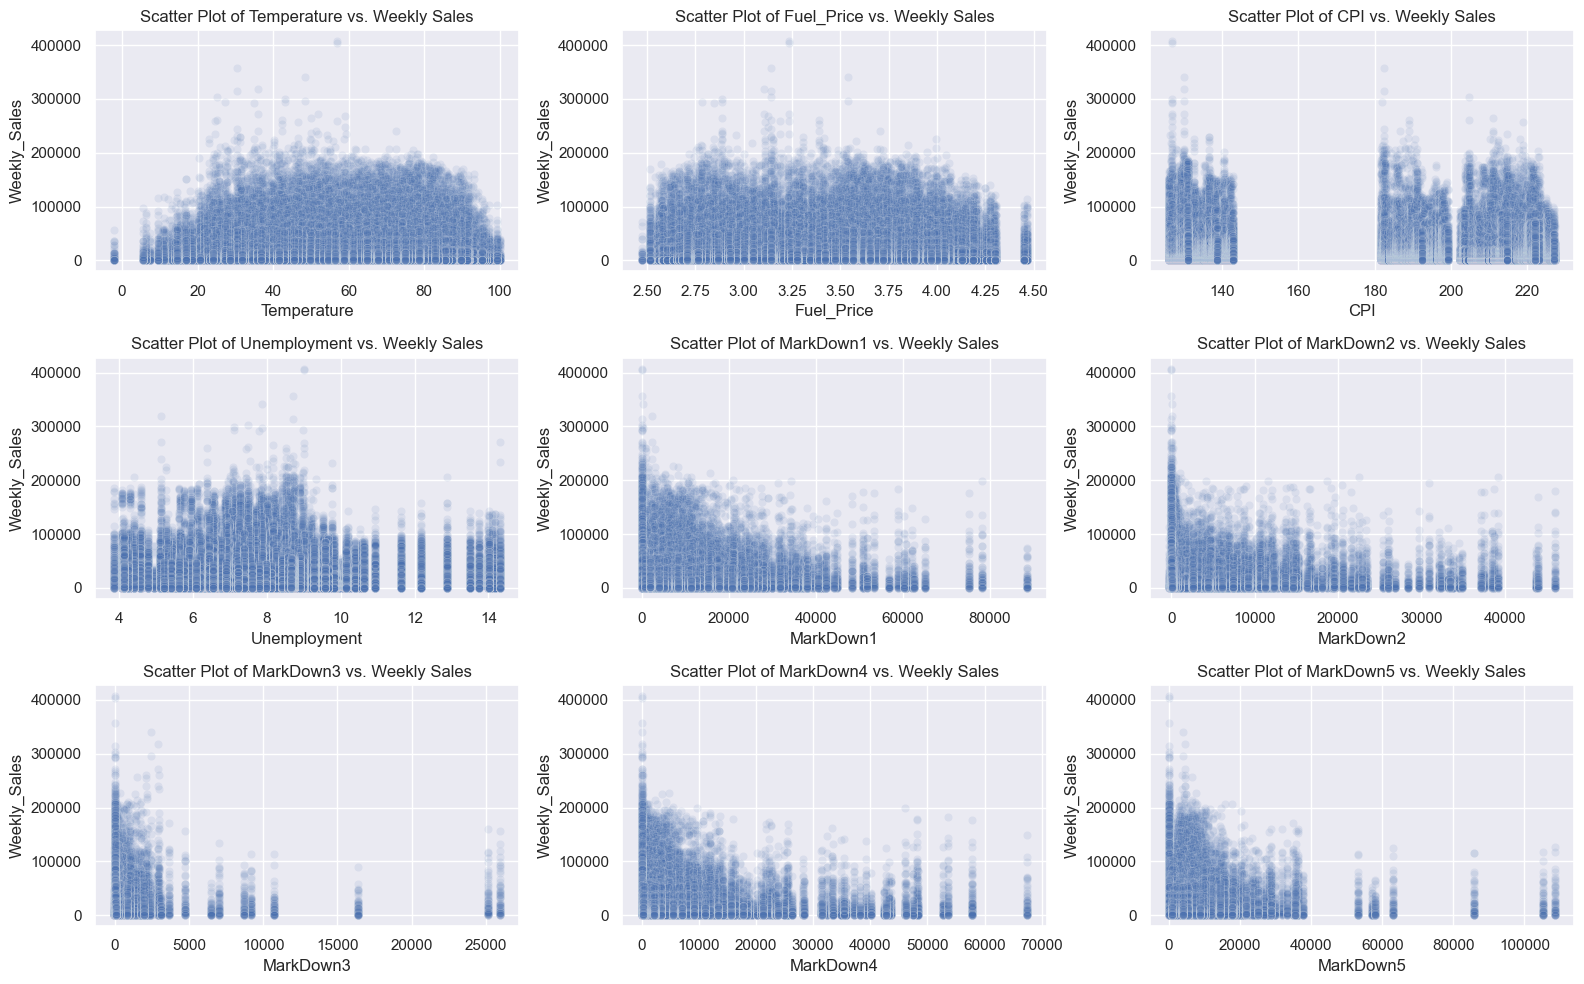

In [31]:
dfcorrected = df.loc[df.IsHoliday == False] # Correcting for holidays, as they are not representative of the general trend

plt.figure(figsize=(16, 10))

# Loop through the selected features and create scatter plots with regression lines
for i, feature in enumerate(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=feature, y='Weekly_Sales', data=dfcorrected, alpha=0.1)
    plt.title(f'Scatter Plot of {feature} vs. Weekly Sales')

# Adjust layout
plt.tight_layout()

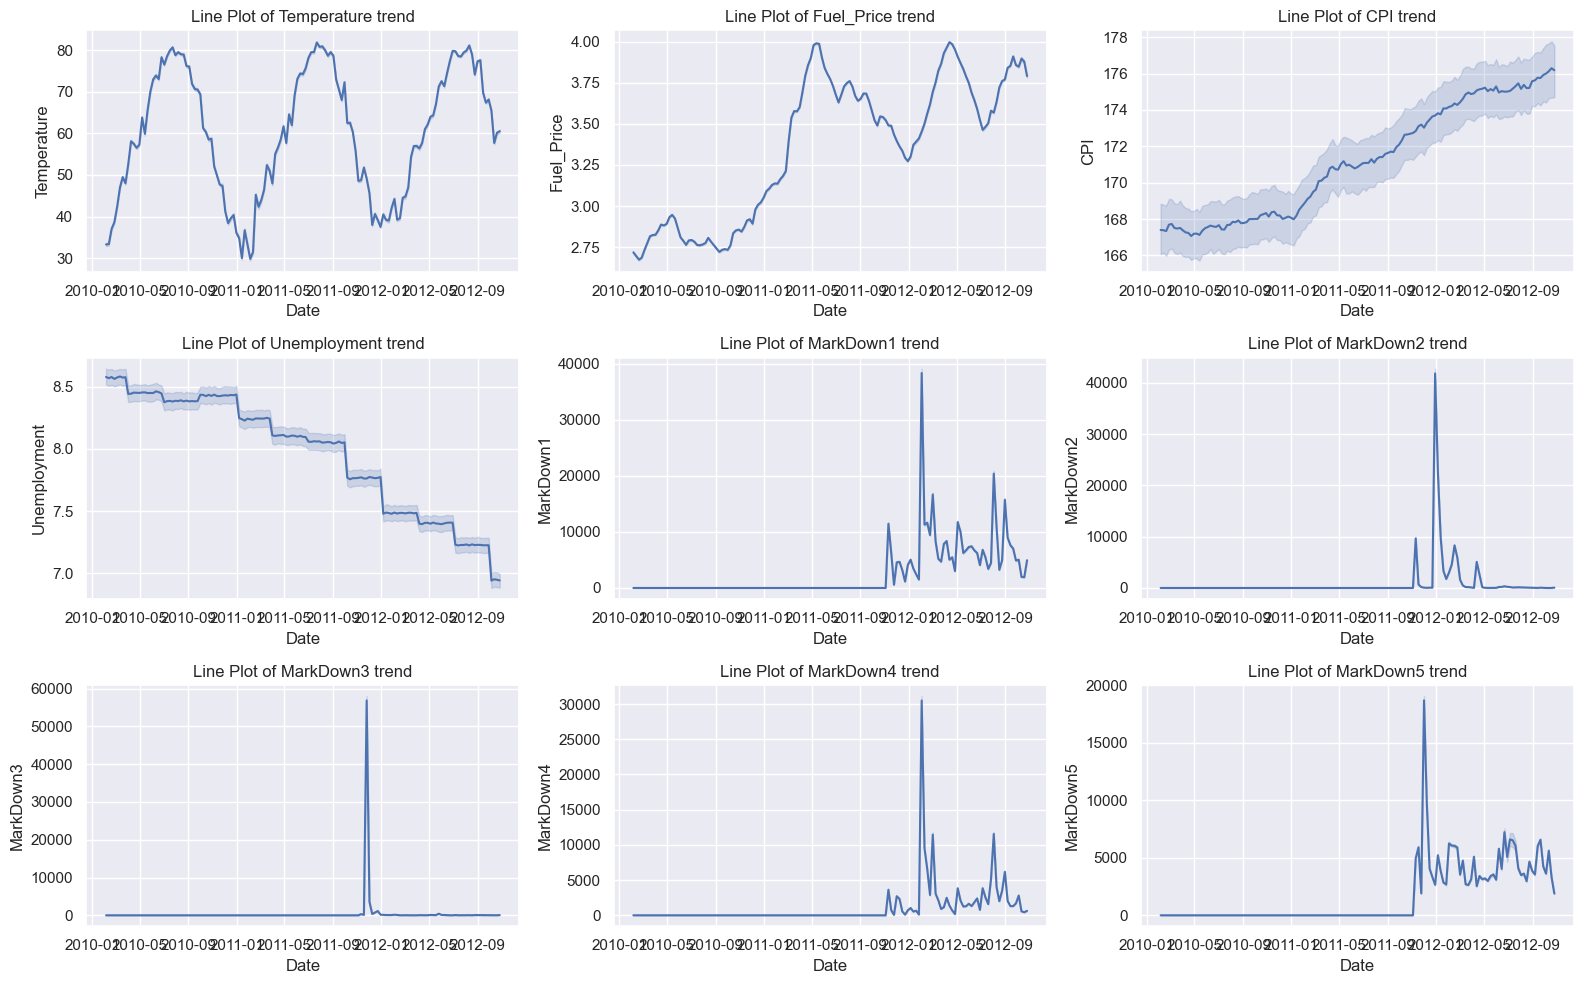

In [32]:
plt.figure(figsize=(16, 10))

# Loop through the selected features and create scatter plots with regression lines
for i, feature in enumerate(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']):
    plt.subplot(3, 3, i + 1)
    sns.lineplot(x='Date', y=feature, data=df)
    plt.title(f'Line Plot of {feature} trend')
    
# Adjust layout
plt.tight_layout()

#### 3.1.4 Store Types and Sizes

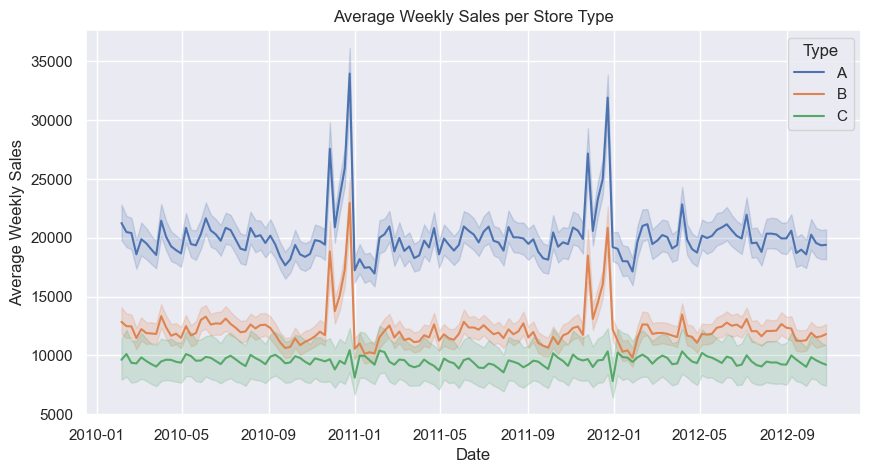

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, 
             x='Date', 
             y='Weekly_Sales',
             hue='Type',
            ).set_title('Average Weekly Sales per Store Type')
plt.ylabel("Average Weekly Sales")
plt.show()

In [34]:
# Get the average weekly sales per store type
df.groupby('Type')['Weekly_Sales'].mean()

Type
A    20099.766466
B    12237.326208
C     9519.638045
Name: Weekly_Sales, dtype: float64

Clearly, the average weekly sales for store type A significantly surpass those of store types B and C. 

In [35]:
size_per_type = df.groupby('Type')['Size'].agg(['mean', 'min', 'max'])
size_per_type

,mean,min,max
Type,,,
A,182231.285486,39690,219622
B,101818.735827,34875,140167
C,40535.725286,39690,42988


Text(0.5, 1.0, 'Boxplot of Store Size by Store Type')

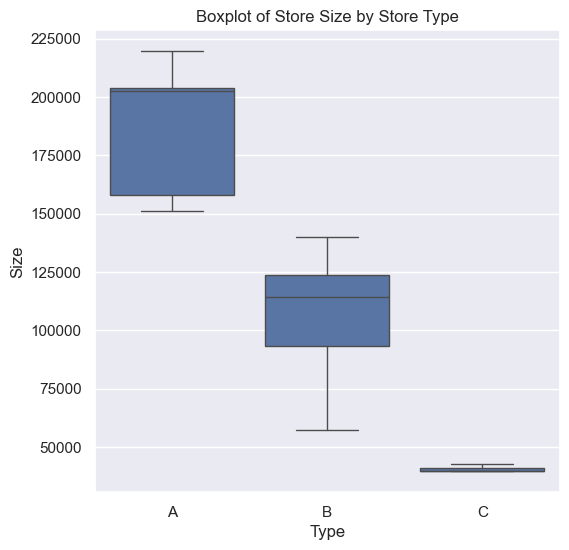

In [36]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Type', y='Size', data=df, showfliers=False)
plt.title('Boxplot of Store Size by Store Type')

Also, on average, stores classified as type A are considerably larger than B and C. This implies that, on average, bigger stores have higher sales.

In [37]:
store_counts = df['Type'].value_counts()
store_counts

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

There are significantly more type A stores than B and C. Type A stores are significantly larger in size and have higher average weekly sales than type B and C stores, thus generating higher overall revenue. 

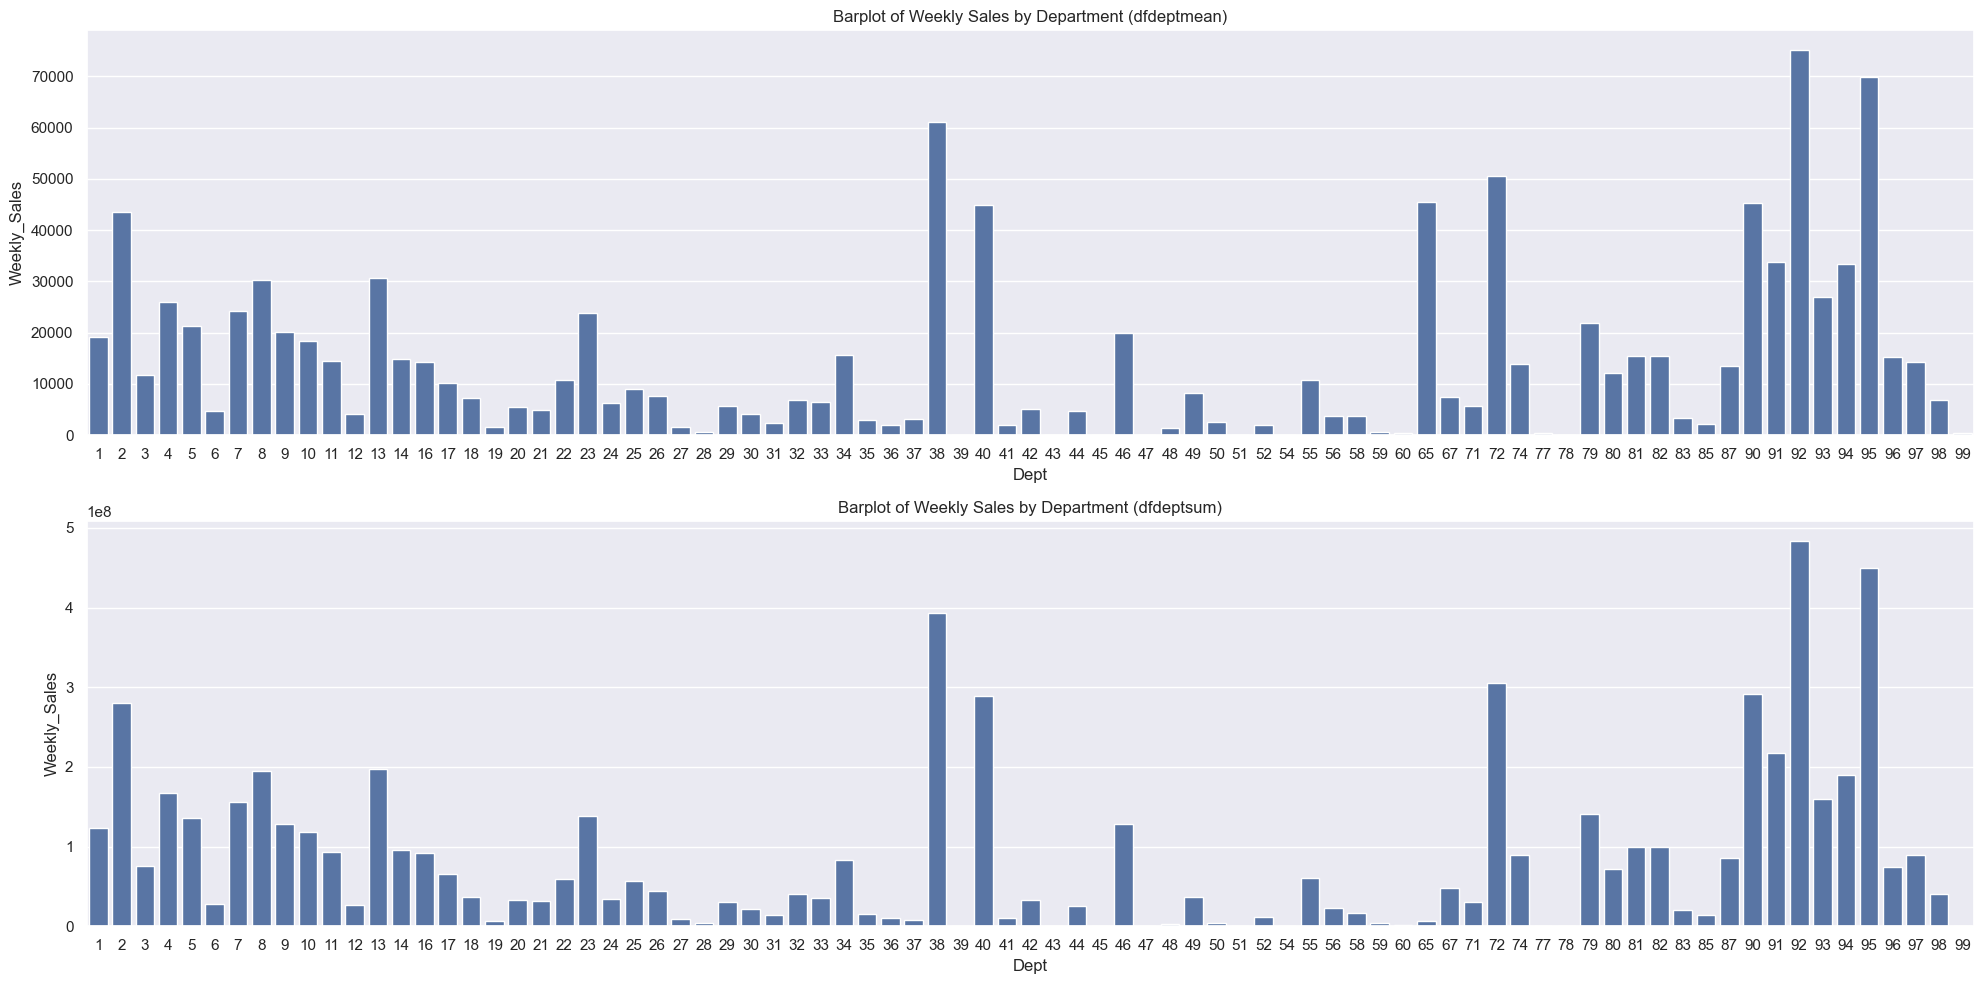

In [38]:
dfdeptmean = df['Weekly_Sales'].groupby(df['Dept']).mean().reset_index()
dfdeptsum = df['Weekly_Sales'].groupby(df['Dept']).sum().reset_index()


fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharey=False)  # Set sharey to False

sns.barplot(x='Dept', y='Weekly_Sales', data=dfdeptmean, ax=axes[0])
axes[0].set_title('Barplot of Weekly Sales by Department (dfdeptmean)')

sns.barplot(x='Dept', y='Weekly_Sales', data=dfdeptsum, ax=axes[1])
axes[1].set_title('Barplot of Weekly Sales by Department (dfdeptsum)')

plt.tight_layout()

There are some departments that account for a significant portion of the overall sales as compared to others.

### 3.2 Discussion

One of our main objectives of this paper is to answer the following research question: What are the main underlying patterns inherent in Walmart's historical sales data? By conducting thorough data analysis, we have made the following key observations:
- Holiday average weekly sales are higher than normal dates
- On Christmas, Thanksgiving, and Black Friday sales are the highest
- Weeks 52 and 1-3 are characterized by a significant decrease in sales
- January sales are considerably less than other months
- Most stores are classified as Type A which implies that they are large and sell more
- Markdown3 is a Thanksgiving and Cyber Monday promotion
- Markdown2 is primarily employed at the end of the year and during colder periods
- CPI, Temperature, Unemployment, and Fuel_Price do not or merely to a limited extend correlate with the Weekly_Sales

These observations can help Walmart make more informed decisions and assist strategy development. 

## 4. Model Training and evaluation

The following code can also be accessed through a web-app, by running the run.bat file.

### 4.1 Final Preparations

In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'], inplace=True)
df.drop(columns=['IsHoliday', 'Size', 'year', 'day'], inplace=True)
df = pd.get_dummies(df, columns=['Store', 'Dept', 'month', 'WeekOfYear'])

In [40]:
# creating different dataframes for each store type
dfa = df.loc[df['Type']=='A'].drop(columns=['Type'])
dfb = df.loc[df['Type']=='B'].drop(columns=['Type'])
dfc = df.loc[df['Type']=='C'].drop(columns=['Type'])

dflist = [dfa, dfb, dfc]
typedic = {'A': 0, 'B': 1, 'C': 2}

In [41]:
split_date = datetime(2011, 10, 1)

trainlist = [df[df.index < split_date] for df in dflist]
testlist = [df[df.index >= split_date] for df in dflist]

### 4.2 Linear Regression and Random Forest

In [42]:
def make_prediction(type, model):
    k = typedic[type]
    
    df = dflist[k]
    train = trainlist[k]
    test = testlist[k]
    
    X_train = train.drop(columns=['Weekly_Sales'])
    y_train = train['Weekly_Sales']
    X_test = test.drop(columns=['Weekly_Sales'])
    y_test = test['Weekly_Sales']

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if model == 'Linear Regression':
        param_grid = {
            'fit_intercept': [True, False],
            'alpha': np.logspace(0, 10, 20)
        }
        
        lr = Ridge()
        
        lr_cv = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
        
        lr_cv.fit(X_train_scaled, y_train)
        
        print("Best parameters found: ", lr_cv.best_params_)
        
        y_pred_test = lr_cv.predict(X_test_scaled)

    elif model == 'Random Forest Regressor':
        param_grid = {
            'n_estimators': [20, 50],
            'max_depth': [10, 40, 60],
            'max_features': ['sqrt', 'log2']
        }

        rf = RandomForestRegressor()

        rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=5, cv=3, verbose=2, random_state=42, n_jobs=-1)

        rf_cv.fit(X_train_scaled, y_train)

        print("Best parameters found: ", rf_cv.best_params_)
            
        y_pred_test = rf_cv.predict(X_test_scaled)        
    
    plotdf = pd.DataFrame({
        'Date': test.index,
        'test': test['Weekly_Sales'],
        'pred': y_pred_test
    })
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=train.index, y='Weekly_Sales', data=train)
    sns.lineplot(x=plotdf['Date'], y='test', data=plotdf)
    sns.lineplot(x=plotdf['Date'], y='pred', data=plotdf)

    plt.legend(labels=['Train', 'Train Variance', 'Test', 'Test Variance', 'Predictions', 'Prediction Variance'])
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.title(f'Weekly Sales Over Time for Store Type {type} with Predictions')
    
    return plt.show()

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best parameters found:  {'alpha': 1438.449888287663, 'fit_intercept': True}


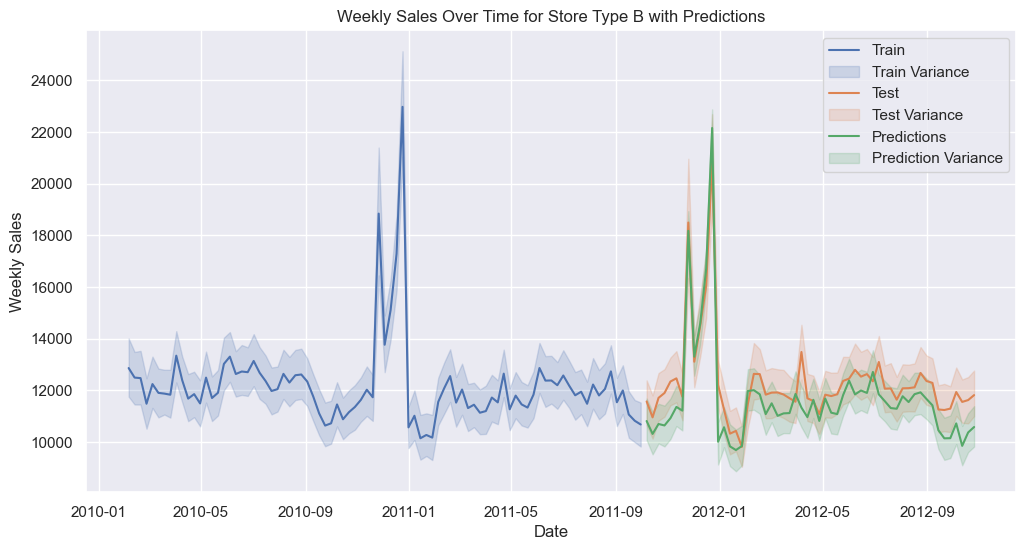

In [45]:
make_prediction('B', 'Linear Regression')

We implemented two common supervised learning models: 
- Linear regression with ridge penalization and grid search cross validation to find the best alpha parameter.
- Random forest regressor with randomized search cross validation for faster runtime to find the best hyperparameters like number of trees.

Both perform quite good on the test set and correctly predict the surge in sales around christmas.

## 5. Conclusion
By calling the function make_prediction(type, model) the user can choose between the storetypes and models to get a prediction for the time period from 01.10.2011 to 26.10.2012. In a real case scenario the features for the forecasting time period would themselves be forecastes. This is not to complicated though, as most of the features like store, department, size, month and so on are determenistic. Furthermore the remaining features like unemployment or cpi, could either be predicted using time series models like ARIMA, or left away as they do not have a significant correlation to the weekly sales as seen in our data analysis. To conclude, a machine learning model can be a very effective tool to help a store owner plan his inventory and thus can be an effective tool in his daily business.

The streamlit app can be accessed by starting the run.bat file, assuming you have streamlit installed on your local machine (pip install streamlit).

Thank you for reading and marry christmas 🎄!

# Sources
Ahmedov, A. (n.d.). <em>Walmart Sales Forecast: Walmart Sales Forecasting A CRISP-DM Model</em>. Kaggle. https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast/data
<br>
<br>
Chaubard, F. (2023). <em>AI for Retail</em>. Wiley.
<br>
<br>
Turner, M., Erb, J. P., Tobin, B., & Ryan, L. (2022, July 31). <em>How Walmart is trying to solve its excessive-inventory issues</em>. Business Insider. https://www.businessinsider.com/walmart-memo-inventory-price-drop-profit-summer-inflation-2022-7